Acurácia do modelo: 80.95%


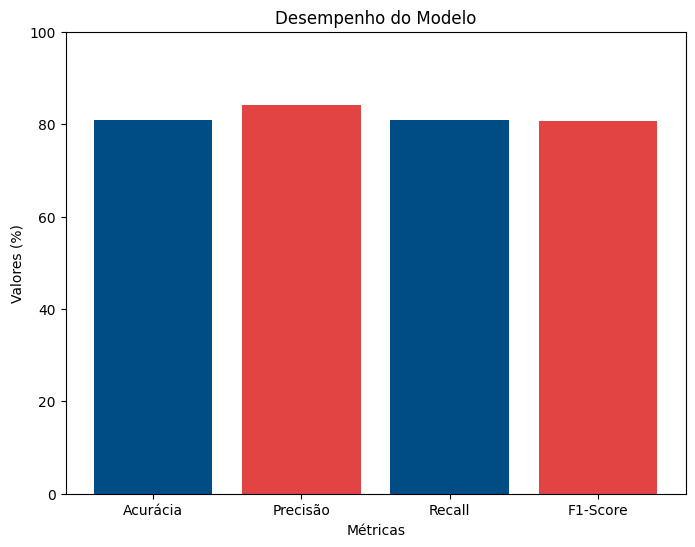

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [1]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('clientes_shopping.csv')

# Inicializar o Label Encoder
label_encoder = LabelEncoder()

# Listar as colunas a serem codificadas
categorical_columns = ['Faixa Etária', 'Motivo da Visita', 'Tipos de Lojas Frequentadas', 'Fatores de Compra', 'Preferência de Marcas']

# Aplicar o Label Encoder a cada coluna categórica
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Definir as colunas de características e o rótulo
X = df[categorical_columns]
y = df['Tipos de Lojas Frequentadas']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar o modelo
model = RandomForestClassifier(random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

# Calcular outras métricas
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Exibir a acurácia no console
print(f'Acurácia do modelo: {accuracy_percentage:.2f}%')

# Plotar o gráfico das métricas
metrics = {'Acurácia': accuracy, 'Precisão': precision, 'Recall': recall, 'F1-Score': f1}
metric_names = list(metrics.keys())
metric_values = [metrics[metric] * 100 for metric in metric_names]

plt.figure(figsize=(8, 6))
plt.bar(metric_names, metric_values, color=['#004D85', '#E24443', '#004D85', '#E24443'])
plt.xlabel('Métricas')
plt.ylabel('Valores (%)')
plt.title('Desempenho do Modelo')
plt.ylim(0, 100)

# Salvar o gráfico
plt.savefig('metricas_modelo.png')

# Mostrar o gráfico
plt.show()

# Salvar o modelo treinado
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Dicionário de mapeamento dos tipos de consumo
mapa_tipos_consumo = {
    0: "Eletrônicos",
    1: "Roupas",
    2: "Alimentos",
    3: "Livros",
    4: "Jogos",
    5: "Beleza",
    6: "Casa e Jardim",
}

# Função para fazer a previsão
def fazer_previsao(email):
    # Encontrar o índice onde o e-mail corresponde na coluna 'Email Cadastrado'
    indice_cliente = df[df['Email Cadastrado'] == email].index

    if len(indice_cliente) > 0:
        # Se encontrou o cliente, pegue o primeiro índice (pode haver mais de um se houver duplicatas)
        indice_cliente = indice_cliente[0]

        # Selecionar as features usadas no treinamento do modelo
        features_usadas_no_treino = X_train.columns

        # Selecionar apenas as features necessárias para a previsão
        X_client = df.loc[indice_cliente, features_usadas_no_treino]

        # Verificar se o número de features de X_client é o mesmo que o modelo espera
        if X_client.shape[0] == len(features_usadas_no_treino):
            # Fazer a previsão usando o modelo treinado
            predicted_class = model.predict(X_client.values.reshape(1, -1))

            # Obter a descrição do tipo de consumo previsto
            descricao_consumo = mapa_tipos_consumo.get(predicted_class[0], "Tipo de consumo desconhecido")

            return descricao_consumo
        else:
            return 'Erro: O número de features de X_client não corresponde ao modelo treinado.'
    else:
        return 'Cliente não encontrado na base de dados.'

# Botão
def clique_prever():
    email = entrada_email.get()
    resultado_previsao = fazer_previsao(email)
    resultado_label.config(text=f"Tipo de consumo previsto para {email}: {resultado_previsao}", fg="#E24443")

# Front-end
root = tk.Tk()
root.title("Previsão de Tipos de Consumo")
root.configure(bg='white')

frame = tk.Frame(root, padx=20, pady=20, bg='white')
frame.pack()

label_email = tk.Label(frame, text="Digite seu e-mail:", bg='white', fg='#004D85')
label_email.grid(row=0, column=0, sticky='w')

entrada_email = tk.Entry(frame, width=30, bg='#f0f0f0', fg='#004D85')
entrada_email.grid(row=0, column=1)

botao_prever = tk.Button(frame, text="Prever", command=clique_prever, bg='#004D85', fg='white', relief='flat', padx=10, pady=5)
botao_prever.grid(row=1, column=0, columnspan=2, pady=10)

resultado_label = tk.Label(frame, text="", bg='white', fg='#E24443')
resultado_label.grid(row=2, column=0, columnspan=2)

root.mainloop()